In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
excel_file_path = r'C:\Users\asus\Desktop\iknowthis\finalenv\SRIP PRE TRAINED\algorithms.xlsx'
df = pd.read_excel(excel_file_path)
print(df)

                                              question   type
0                                Define data structure  close
1    What do you mean by non-linear data structure?...  close
2      What do you linear data structure? Give example  close
3    List the various operations that can be perfor...  close
4    What is abstract data type? What are all not c...  close
..                                                 ...    ...
414  Find the longest increasing subsequence in an ...  close
415  Find the shortest path in an unweighted graph ...  close
416  Find the shortest path in a weighted graph usi...  close
417  Find the shortest path in a weighted graph wit...  close
418  Find the longest path in a directed acyclic gr...  close

[419 rows x 2 columns]


In [3]:
df = df.dropna(subset=['question'])
df = df[df['question'].apply(lambda x: isinstance(x, str))]
df['type'] = df['type'].astype('category').cat.codes

In [3]:
#dont use
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://cogcomp.seas.upenn.edu/Data/QA/QC/train_1000.label"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")


In [4]:
#dont use
from datasets import load_dataset

dataset = load_dataset("launch/open_question_type")

In [7]:
#dont use
fquestions=[]
flabel=[]
for i in df['question']:
    fquestions.append(i)
for i in df['type']:
    flabel.append(i)
print(len(flabel),len(fquestions))
    
#open=0 close=1

408 408


In [26]:
import pandas as pd

# Assuming your DatasetDict is stored in a variable called dataset_dict

# Merge train and test datasets
merged_df = pd.concat([dataset['train'].to_pandas(), dataset['test'].to_pandas()], ignore_index=True)

# Drop unnecessary columns
merged_df.drop(columns=['id', 'annotator1', 'annotator2', 'resolve_type'], inplace=True)

In [27]:
open=0
close=0
qlist=soup.text.split("\n")

for text in qlist:
  j=text.split(" ",1)


  if(len(j)>1):
    fquestions.append(j[1])


    if(j[0].startswith("DESC")):
      flabel.append(0)
      open+=1
    else:
      flabel.append(1)
      close+=1
print(open,close)


211 789


In [9]:
print(merged_df)

                                               question
0     When two bacteria exchange genetic information...
1     Is it possible to be your brothers best friend...
2     Is internet gambling or wagering prohibited in...
3                   How can u tell if a girl likes you?
4     Is it OK to have a newborn sleep with the pare...
...                                                 ...
4371  Why can't we use other countries' research whe...
4372  How does cancer start in one specific part of ...
4373  How are commuter trains able to operate backwa...
4374  Why are some smaller countries able to outcomp...
4375  How does Instagram know the difference between...

[4376 rows x 1 columns]


In [28]:
fquestions.extend(list(merged_df['question'])[:578])

In [29]:
for i in range(578):
    flabel.append(0)


In [13]:
print(len(fquestions),len(flabel))

408 408


In [4]:
import nltk
import re
import unicodedata
import inflect
import contractions

from nltk.corpus import stopwords
#lemma = WordNetLemmatizer()






    
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english') and word.lower() not in ["why","how","when","who","what","can","could","would","should"]:
            new_words.append(word)
    words=new_words
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    words=new_words
    

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    words=new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    words=new_words
    

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    words=new_words
    
def normalize(words):
    replace_numbers(words)
    remove_punctuation(words)
    to_lowercase(words)
    remove_non_ascii(words)
    remove_stopwords(words)
    return words
    
    
    

In [5]:
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd

In [8]:
for i in fquestions:
    i=normalize(i)

In [20]:
qse = pd.Series(fquestions)
lse =pd.Series(flabel)
xtrain, xtest, ytrain, ytest = train_test_split(qse, lse, shuffle=True, test_size=0.2,stratify=lse)

In [9]:
import gzip
import shutil
from gensim.models import KeyedVectors

# Step 1: Decompress the .gz file
#input_file = r'C:\Users\asus\Desktop\iknowthis\finalenv\CNN TEXT\GoogleNews-vectors-negative300-SLIM.bin.gz'
#output_file = r'C:\Users\asus\Desktop\iknowthis\finalenv\CNN TEXT\word2vec_model\GoogleNews-vectors-negative300-SLIM.bin'

# Decompress the file
#with gzip.open(input_file, 'rb') as f_in:
#    with open(output_file, 'wb') as f_out:
#        shutil.copyfileobj(f_in, f_out)

print("File decompressed successfully")


# Step 2: Load the Word2Vec model
model_path = 'word2vec_model/GoogleNews-vectors-negative300-SLIM.bin'
embed_lookup = KeyedVectors.load_word2vec_format(model_path, binary=True)

File decompressed successfully


In [ ]:
words = embed_lookup.index_to_key  # Get the list of words in the vocabulary

print(words)  # Print the list of words

pretrained_words = {}
for word in words:
    pretrained_words[word] = embed_lookup[word]  # Get the vector for each word

# Now pretrained_words contains all word vectors
print(pretrained_words)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [32]:
pretrained_words = {}
for word in words:
    pretrained_words[word]=embed_lookup[word]

KeyError: "Key '0.0529562309384346' not present"

In [58]:
print(len(pretrained_words))

299567


In [10]:
def tokenize_all_questions(embed_lookup, questions):
    tokenized_questions = []
    
    for question in questions:
        # Tokenize each question into words
        words = question.split()
        
        # Initialize list to store tokenized indices for current question
        tokenized_question = []
        
        # Convert each word to its embedding index if available, otherwise use 0 (for out-of-vocabulary words)
        for word in words:
            try:
                idx = embed_lookup.key_to_index[word]
            except KeyError:
                idx = 0  # Use 0 for out-of-vocabulary words or adjust as needed
            tokenized_question.append(idx)
        
        tokenized_questions.append(tokenized_question)
    
    return tokenized_questions
tokenized_questions = tokenize_all_questions(embed_lookup, fquestions)

In [22]:
print(tokenized_questions)
print(features)

[[57030, 414, 2287], [443, 53, 38, 1091, 16, 0, 414, 0, 7371, 0], [443, 53, 38, 17416, 414, 0, 7371, 991], [10404, 9, 1031, 625, 2, 45, 14, 2418, 4, 414, 0], [443, 3, 14807, 414, 0, 443, 17, 47, 11, 1343, 0, 24, 0], [10404, 44, 9, 599, 0, 43, 414, 4941, 17, 3199, 0], [0, 443, 3, 0, 2359, 0], [443, 17, 9, 58752, 8307, 0, 72683, 2359, 0], [0, 57030, 29571, 2359, 0], [13561, 113, 9, 1777, 0, 12043, 0, 27383, 0, 2359, 4631], [36409, 160, 31037, 0, 0], [252, 9, 2251, 0, 75063, 14807, 414, 1426, 6, 5515, 0], [252, 9, 6554, 0, 14050, 4631, 58, 29571, 2359, 0], [443, 17, 9, 6554, 0, 29571, 2359, 680, 58, 72683, 2359, 0], [1825, 3, 9, 2359, 680, 219, 1, 157090, 0], [443, 3, 9, 1144, 0, 2359, 680, 58, 0], [443, 3, 9, 14050, 2359, 0], [443, 3, 9, 2109, 2507, 0, 7817, 0, 9, 2359, 0], [443, 3, 9, 1144, 0, 24, 0], [443, 3, 14033, 2359, 0, 252, 95, 49, 1147, 0, 0], [35466, 9, 29076, 1299, 0, 2359, 0, 1150, 25362, 17, 12768, 50, 0, 9194, 0], [13561, 24, 22973, 0, 14956, 0, 27383, 10, 9, 1082, 0, 0], [

In [11]:
def pad_features(tokenized_reviews, seq_length):
    ''' Return features of tokenized_reviews, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(tokenized_reviews):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [39]:
seq_length = 200
import numpy as np
features = pad_features(tokenized_questions, seq_length=seq_length)

In [49]:
print(features)

[[    0     0     0 ...   754  1148     0]
 [    0     0     0 ... 49732  8032     0]
 [    0     0     0 ...   560  1559     0]
 ...
 [    0     0     0 ...    32   145     0]
 [    0     0     0 ... 59477     0     0]
 [    0     0     0 ...   788    24     0]]


In [33]:
unique_tokens = set(token for question in tokenized_questions for token in question)

# Get the length of the unique tokens set
vocab_len = len(unique_tokens)

print("Vocabulary length:", vocab_len)
emd_dim=300
vocab_len=408

Vocabulary length: 780


In [37]:
lse =pd.Series(flabel)
xtrain, xtest, ytrain, ytest = train_test_split(features, lse, shuffle=True, test_size=0.2,stratify=lse)

In [40]:

gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[features]))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,600 (318.75 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 81,600 (318.75 KB)

None


In [41]:
batch_size = 256
epochs  = 5
history = gru_model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size = batch_size, epochs = epochs)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sequential_5_1/embedding_5_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\asus\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\asus\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\asus\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\asus\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\asus\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\asus\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\asus\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\asus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\asus\AppData\Local\Temp\ipykernel_13788\1940353767.py", line 3, in <module>

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\models\sequential.py", line 209, in call

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 202, in call

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 155, in _run_through_graph

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 592, in call

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py", line 146, in call

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\ops\numpy.py", line 4850, in take

  File "C:\Users\asus\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1940, in take

indices[112,286] = 15462 is not in [0, 408)
	 [[{{node sequential_5_1/embedding_5_1/GatherV2}}]] [Op:__inference_one_step_on_iterator_11688]

In [85]:
#start from this
from nltk.tokenize import word_tokenize
qse = pd.Series(fquestions)
lse =pd.Series(flabel)
max_len=300
xtrain, xtest, ytrain, ytest = train_test_split(qse, lse, shuffle=True, test_size=0.2,stratify=lse)

max_words = 10000
print(type(xtrain),type(xtest))
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(xtrain)

xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index

#print('text example:', xtrain[0])
#print('sequence of indices(before padding):', xtrain_seq[0])
#print('sequence of indices(after padding):', xtrain_pad[0])

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [112]:
a,b,c,d=0,0,0,0
for i in ytrain:
    if(i==0):
        a=a+1
    else:
        b=b+1
for i in ytest:
    if(i==0):
        c=c+1
    else:
        d=d+1
print(a,b,c,d)
    

631 631 158 158


In [80]:
emb_dim=300
vocab_len=3460

In [77]:
print(word_index)

{'the': 1, 'what': 2, 'is': 3, 'of': 4, 'a': 5, 'in': 6, 'how': 7, 'to': 8, 'do': 9, 'you': 10, 'for': 11, 'i': 12, 'was': 13, 'are': 14, 'who': 15, 'and': 16, 'can': 17, 'or': 18, "'s": 19, 'does': 20, 'on': 21, 'it': 22, 'many': 23, "''": 24, 'that': 25, 'where': 26, 'when': 27, 'did': 28, 'if': 29, 'why': 30, 'be': 31, 'from': 32, 'name': 33, 'have': 34, 'with': 35, 'has': 36, 'get': 37, 'my': 38, 'an': 39, 'people': 40, 'u': 41, 'which': 42, 'there': 43, 'your': 44, 'first': 45, 'best': 46, 'city': 47, 'as': 48, 'most': 49, 's': 50, 'were': 51, 'find': 52, 'world': 53, 'should': 54, 'out': 55, 'good': 56, 'state': 57, 'year': 58, 'country': 59, 'at': 60, 'take': 61, 'much': 62, 'by': 63, 'would': 64, 'live': 65, 'about': 66, 'american': 67, 'between': 68, 'their': 69, 'me': 70, 'called': 71, 'over': 72, 'mean': 73, 'go': 74, 'will': 75, 'day': 76, 'make': 77, 'think': 78, 'one': 79, 'two': 80, 'old': 81, 'president': 82, 'work': 83, 'man': 84, 'largest': 85, 'up': 86, 'they': 87, '

In [117]:
embedding_matrix = np.zeros((vocab_len, emb_dim))
for word, idx in word_index.items():
    if idx < vocab_len:  # Ensure the index is within bounds
        if word in embed_lookup:
            vector = embed_lookup[word]
            embedding_matrix[idx] = vector
    else:
        print(f"Index {idx} for word '{word}' is out of bounds")
    

In [87]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.07468531  0.09791063  0.04645062 ...  0.00341549  0.04440133
  -0.06421115]
 [ 0.07216946 -0.0031858   0.11102993 ...  0.02952387  0.05147751
  -0.12112357]
 ...
 [-0.04082521  0.05479894  0.04986703 ... -0.03178338 -0.03835925
   0.09370618]
 [-0.0321935   0.06182292 -0.01559818 ... -0.00445154  0.08546947
   0.03034166]
 [-0.06372174 -0.01467531 -0.02191642 ... -0.01921307 -0.05252216
  -0.06990082]]


In [121]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define the model with dropout layers
gru_model = Sequential()
gru_model.add(Embedding(input_dim=vocab_len, output_dim=emb_dim, weights=[embedding_matrix], trainable=False))
gru_model.add(GRU(units=128, return_sequences=False))
gru_model.add(Dropout(0.5))  # Add dropout
gru_model.add(Dense(units=1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [1]:
from keras.utils.vis_utils import plot_model
plot_model(gru_model, to_file='gru_model.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [122]:
batch_size = 256
epochs  = 10
history = gru_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size = batch_size, epochs = epochs)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5557 - loss: 0.6917 - val_accuracy: 0.5823 - val_loss: 0.6858
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6020 - loss: 0.6869 - val_accuracy: 0.5854 - val_loss: 0.6788
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5990 - loss: 0.6800 - val_accuracy: 0.5949 - val_loss: 0.6692
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6151 - loss: 0.6683 - val_accuracy: 0.6424 - val_loss: 0.6513
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6430 - loss: 0.6430 - val_accuracy: 0.6519 - val_loss: 0.6182
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6543 - loss: 0.6202 - val_accuracy: 0.6456 - val_loss: 0.6095
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6567 - loss: 0.6090 - val_accuracy: 0.6804 - val_loss: 0.5961
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6795 - loss: 0.5838 - val_accuracy: 0.6551 - val_loss: 0.6087
Epoch 9/10
5

In [92]:
xtrain_pad = np.clip(xtrain_pad, 0, vocab_len - 1)
xtest_pad = np.clip(xtest_pad, 0, vocab_len - 1)

Text(0.5, 1.0, 'Accuracy')

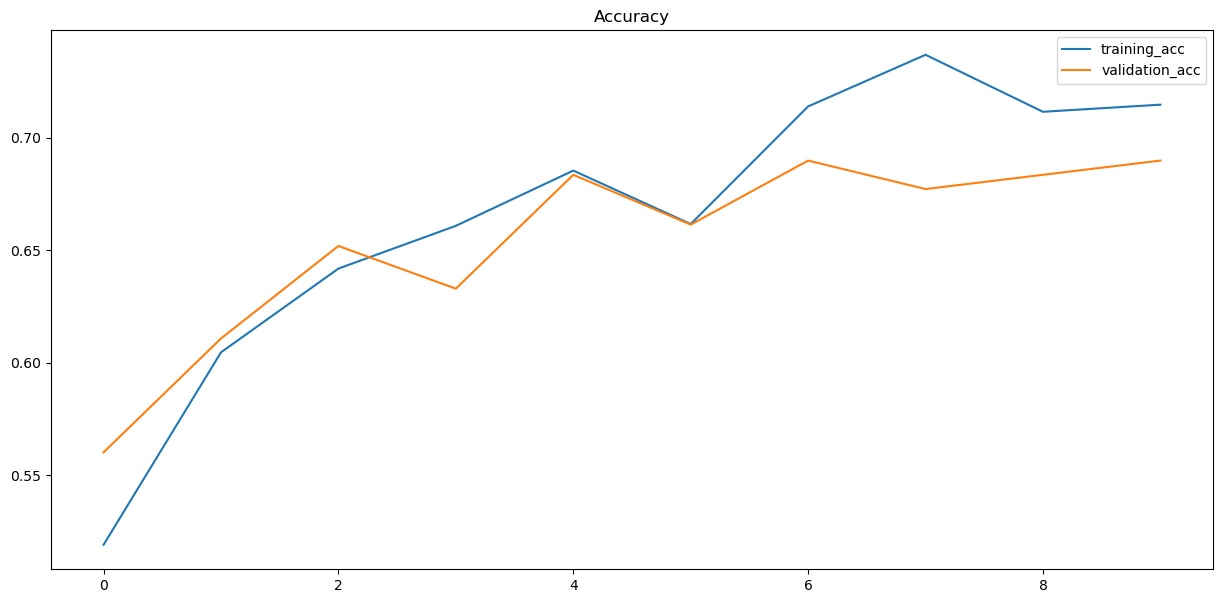

In [94]:
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [90]:
print(xtrain_pad)

[[   0    0    0 ... 1092   11    2]
 [   0    0    0 ...   30 1097   34]
 [   0    0    0 ...  147  243 1099]
 ...
 [   0    0    0 ...  483    7 3501]
 [   0    0    0 ...  117    5  268]
 [   0    0    0 ...    3 3502 3503]]


In [91]:
print(vocab_len)

3460


In [123]:
question="do u believe in god"
tokenizer = Tokenizer()
tokenizer.fit_on_texts(question)
word_index = tokenizer.word_index

In [124]:
embedding_matrix = np.zeros((vocab_len, emb_dim))
for word, idx in word_index.items():
    if idx < vocab_len:  # Ensure the index is within bounds
        if word in embed_lookup:
            vector = embed_lookup[word]
            embedding_matrix[idx] = vector
    else:
        print(f"Index {idx} for word '{word}' is out of bounds")

In [101]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.08573538 -0.00742298  0.03451684 ...  0.01071692 -0.06754909
  -0.00229648]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [125]:
prediction = gru_model.predict(embedding_matrix)

109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step


In [128]:
predicted_class = (prediction > 0.02).astype("int32")

# Print the result
print(predicted_class[0][0])

1


In [44]:
open_ended = df[df['type'] == 0]
closed_ended = df[df['type'] == 1]

In [47]:
from collections import Counter

open_words = [word for question in open_ended for word in question]
closed_words = [word for question in closed_ended for word in question]

open_freq = Counter(open_words)
closed_freq = Counter(closed_words)

# Get the most common words
common_open_words = open_freq.most_common(20)
common_closed_words = closed_freq.most_common(20)
print(common_open_words)
print(common_closed_words)


[('e', 2), ('t', 2), ('q', 1), ('u', 1), ('s', 1), ('i', 1), ('o', 1), ('n', 1), ('y', 1), ('p', 1)]
[('e', 2), ('t', 2), ('q', 1), ('u', 1), ('s', 1), ('i', 1), ('o', 1), ('n', 1), ('y', 1), ('p', 1)]
